In [1]:
import pandas as pd

In [2]:
df2 = pd.read_excel('/content/online_retail_II.xlsx')

In [3]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df2.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df2.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [7]:
df2.duplicated().sum()

6865

In [8]:
df2['StockCode'] = df2['StockCode'].astype(str)
df2['Invoice'] = df2['Invoice'].astype(str)


In [9]:
df2.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [10]:
df2.duplicated().sum()

6865

In [11]:
# df2.drop_duplicates(inplace=True)

In [12]:
# df2.duplicated().sum()

<Axes: >

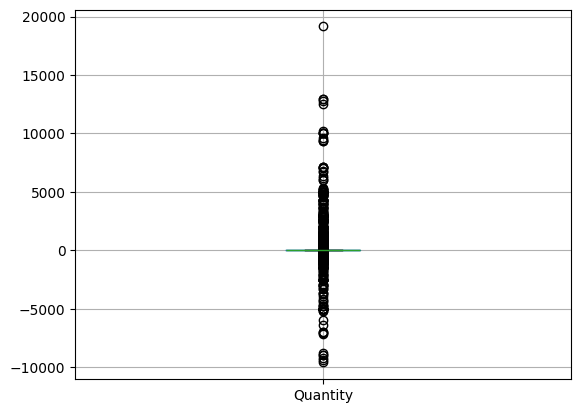

In [13]:
df2.boxplot(column=['Quantity'])

<Axes: >

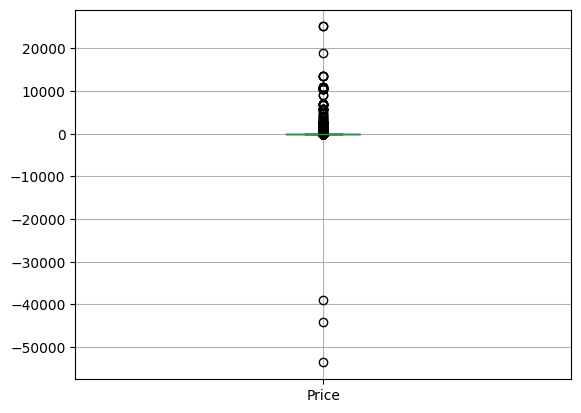

In [14]:
df2.boxplot(column=['Price'])

In [15]:
filterCustomerNull = df2['Customer ID'].isnull()
df2_null = df2[filterCustomerNull]
indexToDeleCust =  df2_null['Customer ID'].index
print(indexToDeleCust)
invoiceToDele =  df2_null['Invoice'].unique()
print(invoiceToDele)
df_filtered = df2[~df2['Invoice'].isin(invoiceToDele)]

Index([   263,    283,    284,    470,    577,    578,   1055,   1056,   1057,
         1058,
       ...
       525143, 525144, 525145, 525146, 525147, 525231, 525232, 525233, 525234,
       525235],
      dtype='int64', length=107927)
['489464' '489463' '489467' ... '538160' '538161' '538162']


In [16]:
df_filtered.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [17]:
df_filtered.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417534.000000,417534,417534.000000,417534.000000
mean,12.758815,2010-07-01 01:12:19.787609856,3.887547,15360.645478
min,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 11:26:00,1.250000,13983.000000
50%,4.000000,2010-07-08 19:12:00,1.950000,15311.000000
75%,12.000000,2010-10-14 14:08:00,3.750000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,101.220424,NaN,71.131797,1680.811316


In [18]:
filter = df_filtered['Quantity'] <= 0
df2_wrong = df_filtered[filter]

all_start_with_C = df2_wrong['Invoice'].str.startswith('C').sum()
print(all_start_with_C)
print(df2_wrong.shape)

9839
(9839, 8)


In [19]:
filterQuantity = df_filtered['Quantity'] <= 0
df2_wrong = df_filtered[filterQuantity]
invoiceToDeleteQuantity =  df2_wrong['Invoice'].unique()
print(invoiceToDeleteQuantity)
df_filtered2 = df_filtered[~df_filtered['Invoice'].isin(invoiceToDeleteQuantity)]

['C489449' 'C489459' 'C489476' ... 'C538123' 'C538124' 'C538164']


In [20]:
df_filtered2.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.000000,407695,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294188,15368.504107
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.842229,NaN,34.756655,1679.795700


In [21]:
# filterPrice = df_filtered2['Price'] <= 0
# df2_wrongPrice = df_filtered2[filterPrice]
# print(df2_wrongPrice.shape)
# listOfProducts = df2_wrongPrice['StockCode'].unique()
# print(listOfProducts)
# invoiceToDeletePrice =  df2_wrong['Invoice'].unique()
# print(invoiceToDeletePrice)
# df_filtered2.loc[]

In [22]:
# Filter rows where Price <= 0
filterPrice = df_filtered2['Price'] <= 0
df2_wrongPrice = df_filtered2[filterPrice]

# Get unique products with incorrect prices
listOfProducts = df2_wrongPrice['StockCode'].unique()

# Iterate through the list of products with wrong prices
for product in listOfProducts:
    # Find the most common price for this product in rows with correct prices
    correct_price = df_filtered2.loc[(df_filtered2['StockCode'] == product) & (df_filtered2['Price'] > 0), 'Price'].mode()

    if not correct_price.empty:  # If a valid price exists
        # Update the wrong prices in the DataFrame
        df_filtered2.loc[(df_filtered2['StockCode'] == product) & (df_filtered2['Price'] <= 0), 'Price'] = correct_price[0]

# Check the updated DataFrame
df_filtered2


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [23]:
df_filtered2.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.000000,407695,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294577,15368.504107
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.842229,NaN,34.756661,1679.795700


In [24]:
df_filtered2.sort_values(by='Price', ascending=False).head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063.0,United Kingdom
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949.0,United Kingdom
129987,501768,M,Manual,1,2010-03-19 11:45:00,6958.17,15760.0,Norway
129903,501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760.0,Norway
...,...,...,...,...,...,...,...,...
277590,516350,21769,VINTAGE POST OFFICE CABINET,1,2010-07-20 10:34:00,79.95,14493.0,United Kingdom
429540,530418,21769,VINTAGE POST OFFICE CABINET,1,2010-11-03 08:04:00,79.95,13331.0,United Kingdom
159408,504580,21769,VINTAGE POST OFFICE CABINET,1,2010-04-15 08:33:00,79.95,17519.0,United Kingdom
58967,494672,21769,VINTAGE POST OFFICE CABINET,1,2010-01-17 15:46:00,79.95,14404.0,United Kingdom


In [25]:
pd.set_option('display.max_rows', 15)

In [26]:
filterPriceDelete = df_filtered2['Price'] <= 0.001
df2_wrongPrice = df_filtered2[filterPriceDelete]
invoiceToDeletePrice =  df2_wrongPrice['Invoice'].unique()
print(invoiceToDeletePrice)
df_filtered3 = df_filtered2[~df_filtered2['Invoice'].isin(invoiceToDeletePrice)]
df_filtered3

['494914' '496222' '496473' '496643' '497935' '498562' '499056' '499399'
 '501176' '504332' '506303' '522766' '531433' '533528']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [27]:
df_filtered3.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407250.000000,407250,407250.000000,407250.000000
mean,13.583435,2010-07-01 12:09:51.921031168,3.294774,15369.576032
min,1.000000,2009-12-01 07:45:00,0.030000,12346.000000
25%,2.000000,2010-03-26 14:16:00,1.250000,13999.000000
50%,5.000000,2010-07-11 10:28:00,1.950000,15321.500000
75%,12.000000,2010-10-14 17:13:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.892764,NaN,34.775515,1679.935705


In [28]:
all_worng_description = ((df_filtered3['Description'].str.contains('Adjustment by')) | (df_filtered3['Description'] == ('POSTAGE')) | (df_filtered3['Description'] == ('Manual')))
wrong_descriptionDF = df_filtered3[all_worng_description]
listOfWrongDescriptionInvoices =  wrong_descriptionDF['Invoice'].unique()
print(listOfWrongDescriptionInvoices)
df_filtered4 = df_filtered3[~df_filtered3['Invoice'].isin(listOfWrongDescriptionInvoices)]
df_filtered4

['489439' '489444' '489447' ... '538008' '538093' '538147']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [29]:
df_filtered4.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [30]:
df_filtered4.sort_values(by='Price', ascending=False).head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
466662,533370,22656,VINTAGE BLUE KITCHEN CABINET,2,2010-11-17 10:31:00,295.0,15874.0,United Kingdom
268525,515349,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-07-12 10:43:00,295.0,15513.0,United Kingdom
275451,516164,22655,VINTAGE RED KITCHEN CABINET,1,2010-07-18 12:19:00,295.0,15151.0,United Kingdom
362285,524482,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-09-29 11:40:00,295.0,15734.0,United Kingdom
301423,518756,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-08-11 12:59:00,295.0,16985.0,United Kingdom
426333,530087,22655,VINTAGE RED KITCHEN CABINET,1,2010-11-01 13:33:00,295.0,16732.0,United Kingdom
272236,515811,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-07-15 08:46:00,295.0,15259.0,United Kingdom
268526,515349,22655,VINTAGE RED KITCHEN CABINET,1,2010-07-12 10:43:00,295.0,15513.0,United Kingdom
355259,523946,22655,VINTAGE RED KITCHEN CABINET,1,2010-09-26 11:23:00,295.0,16833.0,United Kingdom
292665,517930,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-08-03 10:38:00,295.0,15727.0,United Kingdom


In [32]:
df_filtered4.sort_values(by='Price', ascending=True).head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
298952,518505,16053,POPART COL BALLPOINT PEN ASST,2000,2010-08-09 13:10:00,0.03,14277.0,France
358773,524174,16053,POPART COL BALLPOINT PEN ASST,2000,2010-09-27 16:30:00,0.03,13687.0,United Kingdom
15401,490685,17061,ASSORTED SHAPED STENCIL FOR HENNA,52,2009-12-07 13:48:00,0.04,13206.0,United Kingdom
298951,518505,16162L,THE KING GIFT BAG,3744,2010-08-09 13:10:00,0.05,14277.0,France
358772,524174,16162L,THE KING GIFT BAG,3744,2010-09-27 16:30:00,0.05,13687.0,United Kingdom
298956,518505,10123G,ARMY CAMO WRAPPING TAPE,1104,2010-08-09 13:10:00,0.06,14277.0,France
358777,524174,10123G,ARMY CAMO WRAPPING TAPE,1104,2010-09-27 16:30:00,0.06,13687.0,United Kingdom
225333,511132,35015,JACOBS LADDER SMALL,12,2010-06-07 11:23:00,0.06,17987.0,United Kingdom
254062,513915,35015,JACOBS LADDER SMALL,47,2010-06-29 12:10:00,0.06,17884.0,United Kingdom
314780,520027,35015,JACOBS LADDER SMALL,72,2010-08-23 12:56:00,0.06,14321.0,United Kingdom


In [39]:
df_filtered4.to_csv('cleaned_data_online_retail_II.csv', index=False)

<Axes: xlabel='Price', ylabel='Quantity'>

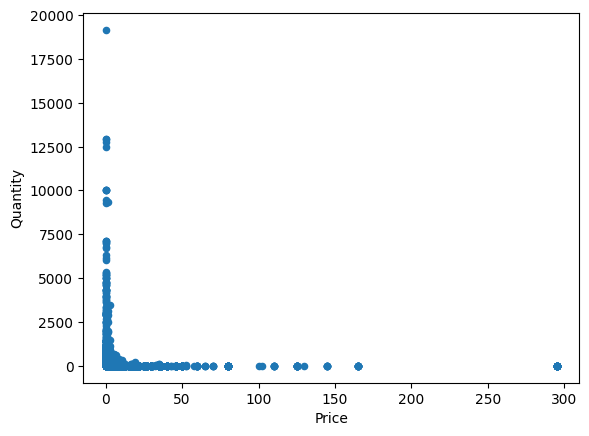

In [33]:
df_filtered4.plot(x='Price', y='Quantity', kind='scatter')

<Axes: >

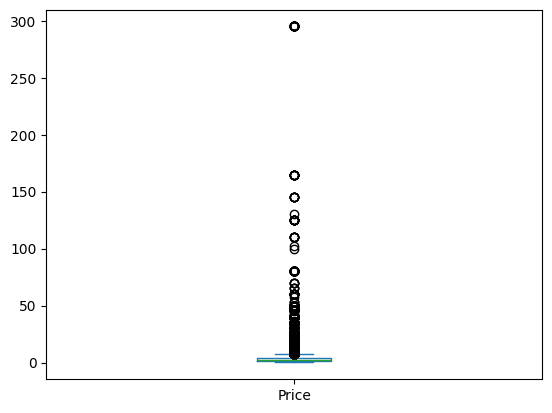

In [34]:
df_filtered4['Price'].plot(kind='box')

<Axes: >

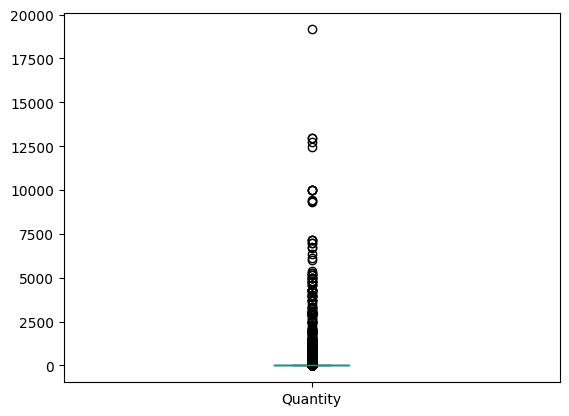

In [35]:
df_filtered4['Quantity'].plot(kind='box')

In [38]:
df_filtered4.sort_values(by='Quantity', ascending=False).head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark
135028,502269,21982,PACK OF 12 SUKI TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135027,502269,21984,PACK OF 12 PINK PAISLEY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135029,502269,21980,PACK OF 12 RED SPOTTY TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
93677,498152,85220,SMALL FAIRY CAKE FRIDGE MAGNETS,9456,2010-02-17 10:51:00,0.30,13902.0,Denmark


In [ ]:
# filter = df2['Quantity'] <= 0
# df2_wrong = df2[filter]
# indexToDele =  df2_wrong['Quantity'].index
# print(indexToDele)
# df2_wrong.sort_values(by='Quantity')